Dec 14, 2021

Jason Cardinal Exercise Notebook Data Camp - Eigenthings and Linear Transformation

[https://data.compass.lighthouselabs.ca/days/w03d5/activities/491]

this notebook contains the code along notes

In this exercise, we will put to practice the new concepts from linear algebra that we've learned. We will start by the linear transformation and then move on to computing eigenvectors and eigenvalues with Numpy. We will elaborate on the idea that we can look at a matrix as a linear transformation and that applying a matrix to its eigenvectors produces new vectors with the same direction. As a bonus, we will also see how to visualize linear transformations in Python!

#### Importing Libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# set the default style of figures
plt.style.use('fivethirtyeight')

#### Matrices as Linear Transformations

We can think of matrices as linear transformations. Some matrices will rotate our space, others will rescale it. When we apply a matrix to a vector, we end up with a transformed version of the vector. When we say that we 'apply a matrix to a vector', it means that we calculate the dot product of the matrix with the vector. We will start with a basic example of this kind of transformation.

Create a transformation matrix A:

In [36]:
A = np.array([[-1,-3], [2,-2]])
A

array([[-1, -3],
       [ 2, -2]])

Create a vector v:

In [37]:
v = np.array([[2], [1]])
v

array([[2],
       [1]])

First, let’s create a function plotVectors() to easily plot vectors and visualize transformations:

In [38]:
def plotVectors(vecs, colors, alpha=1, figsize=(10,8)):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    colors : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors
    figsize : tuple (x_size,y_size)
        Size of the figure

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """

    plt.figure(figsize=figsize)
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    vecs = [vec.flatten() for vec in vecs]

    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        plt.quiver([x[0]],[x[1]],[x[2]],[x[3]],angles='xy',scale_units='xy', scale=1, colours=colors[i],alpha=alpha)

Now, let’s apply the matrix A to this vector and save the result in Av:

In [39]:
Av = A.dot(v)
Av

array([[-5],
       [ 2]])

We’ll plot the old vector v (light blue) and the new one Av (orange):

AttributeError: 'Quiver' object has no property 'colours'

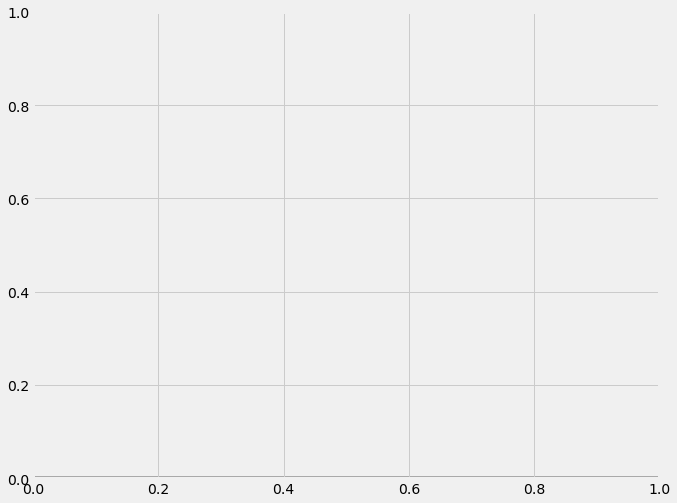

In [40]:
plotVectors([v, Av], colors=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()

#### Eigenvectors

We have seen an example of a vector transformed by a matrix. Now imagine that the transformation of the initial vector gave us a new vector with the same direction. The scale can be different but the direction is the same. When applying a matrix does not change the direction of a vector, this special vector is called an eigenvector of the matrix.

Let’s A be the following matrix:

In [ ]:
A = np.array([[5, 1], [3, 3]])
A

We know that one eigenvector of A is:

In [ ]:
v1 = np.array([[1], [1]])
v1

Apply the matrix A to the first eigenvector v1: python Av1 = A.dot(v1) Av1

We can see that their (Av1 and v1) directions are the same!

In [ ]:
orange = '#FF9A13'
blue = '#1190FF'

plotVectors([Av1, v1], colors=[blue, orange])
plt.ylim(-1, 7)
plt.xlim(-1, 7)
plt.show()

Another eigenvector of A is:

In [ ]:
v2 = np.array([[1], [-3]])
v2

In [ ]:
Av2 = A.dot(v2)

plotVectors([Av2, v2], colors=[blue, orange])
plt.ylim(-7, 1)
plt.xlim(-1, 3)
plt.show()

As we expected, the direction did not change.

This example shows that the eigenvectors v1 and v2 are vectors that change only in scale when we apply the matrix A to them.

#### Finding Eigenvalues and Eigenvectors With Numpy

Numpy linalg module provides a function eig() returning eigenvectors and eigenvalues.

In [ ]:
eigenvals, V = np.linalg.eig(A)

The first array corresponds to the eigenvalues and the second to the eigenvectors concatenated into columns. The first eigenvalue corresponds to the first eigenvector. It is also important to know that np.linalg.eig() does not return eigenvalues ordered by magnitude.

#### Reconstructing Matrix A with Its Eigenvectors and Eigenvalues

Now that we have computed the eigenvalues and eigenvectors of the matrix A, we can reconstruct the original matrix A as a dot product of three matrices.

First, we have to create a diagonal matrix from eigenvalues:

In [ ]:
lambdas = np.diag(eigenvals)
lambdas

Secondly, we compute the inverse matrix of the eigenvector matrix:

In [ ]:
V_inv = np.linalg.inv(V)
V_inv

Now, we are able to reconstruct the original matrix A with the following equation:

In [ ]:
A_orig  = V.dot(lambdas).dot(V_inv)
A_orig

We can see that both matrices (A and A_orig) are the same!

#### Conclusion

In this exercise, we've practiced linear transformation and mastered eigendecomposition with the Numpy library. We have also seen how linear transformation changes the vector direction and what happens with the directions of eigenvectors.